In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from itertools import product
import time

# Set random seeds for reproducibility
np.random.seed(0)

In [176]:
# Load data
data = pd.read_csv('/content/sample_data/heart.csv')
data = pd.get_dummies(data, drop_first=True)

print (data)

# Separate features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0    

In [177]:
# Define KFold for consistent cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=100)

Training time: 0.491 seconds
Logistic Regression Results:
Best Parameters: {'C': 0.02}
Best CV Accuracy: 0.8566618217054263
Test Accuracy: 0.8731884057971014
Test Precision: 0.9215686274509803
Test Recall: 0.8597560975609756
Test F1 Score: 0.8895899053627759


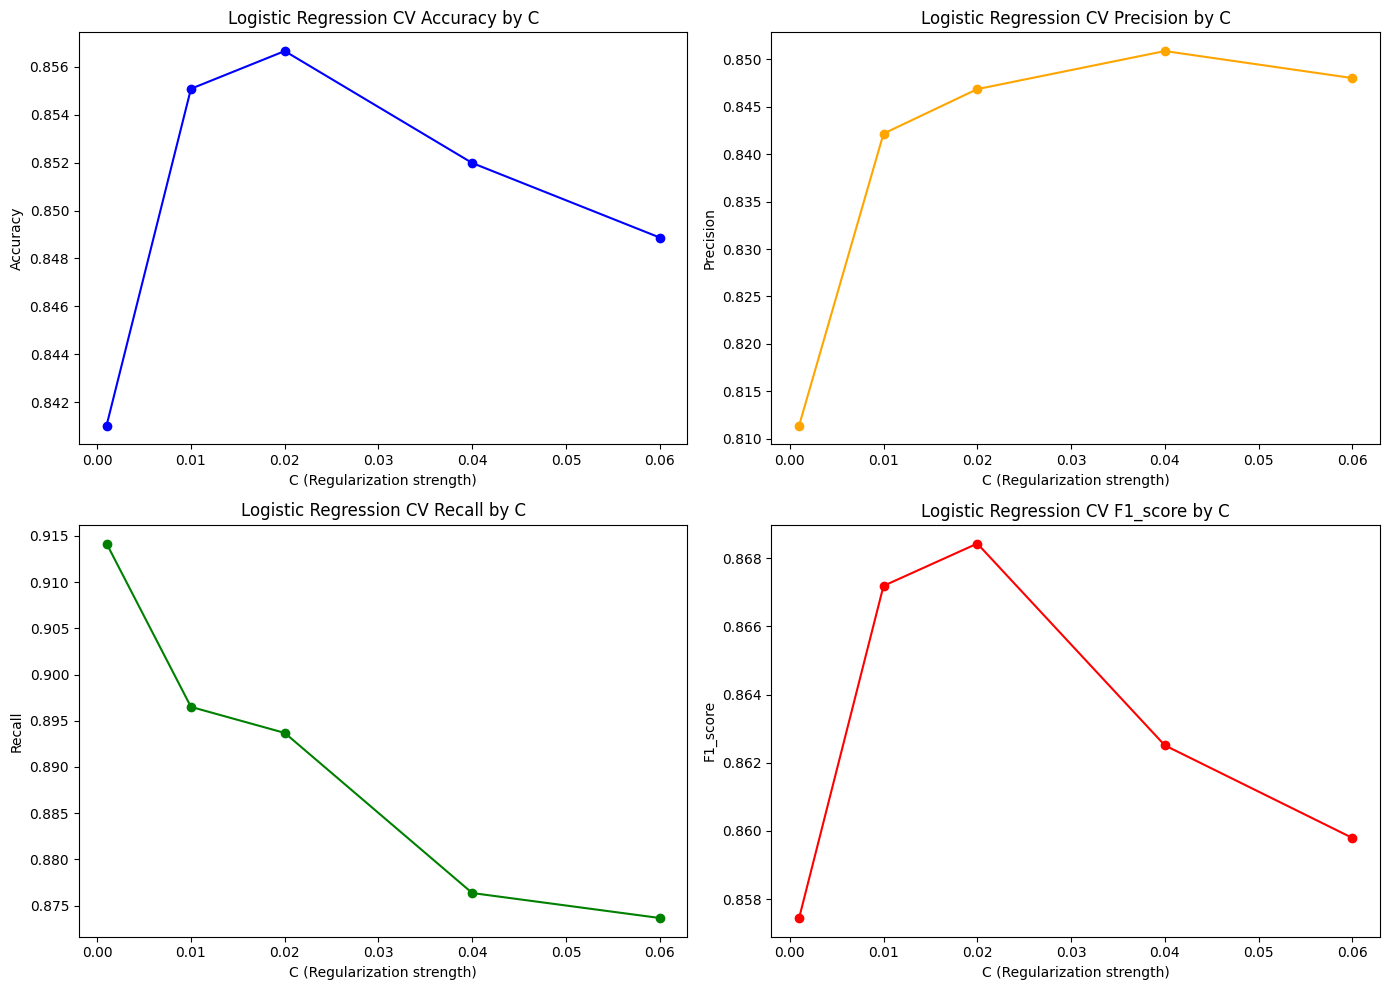

In [178]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# Define scoring dictionary
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

# Logistic Regression Model Configuration with GridSearchCV
model = LogisticRegression(random_state=7)
params = {'C': [0.001, 0.01, 0.02, 0.04, 0.06]}

start_time_lr = time.time()

grid_search = GridSearchCV(model, params, cv=cv, scoring=scoring, refit='accuracy', n_jobs=-1)
grid_search.fit(X_train_norm, y_train)

training_time_lr = time.time() - start_time_lr
print(f"Training time: {training_time_lr:.3f} seconds")

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred_lr = best_model.predict(X_test_norm)

# Calculate and print scores for the test set
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_}")
print(f"Test Accuracy: {accuracy_lr}")
print(f"Test Precision: {precision_lr}")
print(f"Test Recall: {recall_lr}")
print(f"Test F1 Score: {f1_lr}")

# Plotting the metrics
plt.figure(figsize=(14, 10))

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
colors = ['blue', 'orange', 'green', 'red']

# Loop through each metric to plot
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    mean_test_score = grid_search.cv_results_[f'mean_test_{metric}']
    plt.plot(params['C'], mean_test_score, '-o', color=colors[i])
    plt.title(f'Logistic Regression CV {metric.capitalize()} by C')
    plt.xlabel('C (Regularization strength)')
    plt.ylabel(metric.capitalize())

plt.tight_layout()
plt.show()

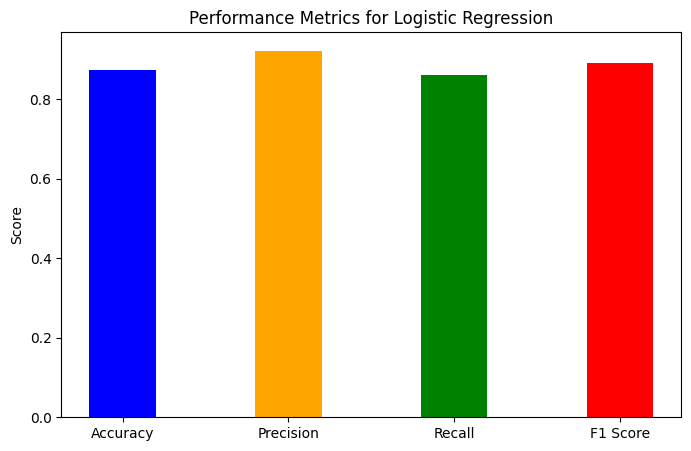

In [179]:
# Plotting results for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_lr = [accuracy_lr, precision_lr, recall_lr, f1_lr]
colors=['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 5))
for i, val in enumerate(values_lr):
    plt.bar(metrics[i], val, color=colors[i], width=0.4, label=f"{metrics[i]}: {val:.4f}")

plt.ylabel('Score')
plt.title('Performance Metrics for Logistic Regression')
plt.show()

Training time: 0.404 seconds
KNN Results:
Best Parameters: {'n_neighbors': 15}
Best CV Accuracy: 0.8612766472868216
Test Accuracy: 0.9094202898550725
Test Precision: 0.9263803680981595
Test Recall: 0.9207317073170732
Test F1 Score: 0.9235474006116207


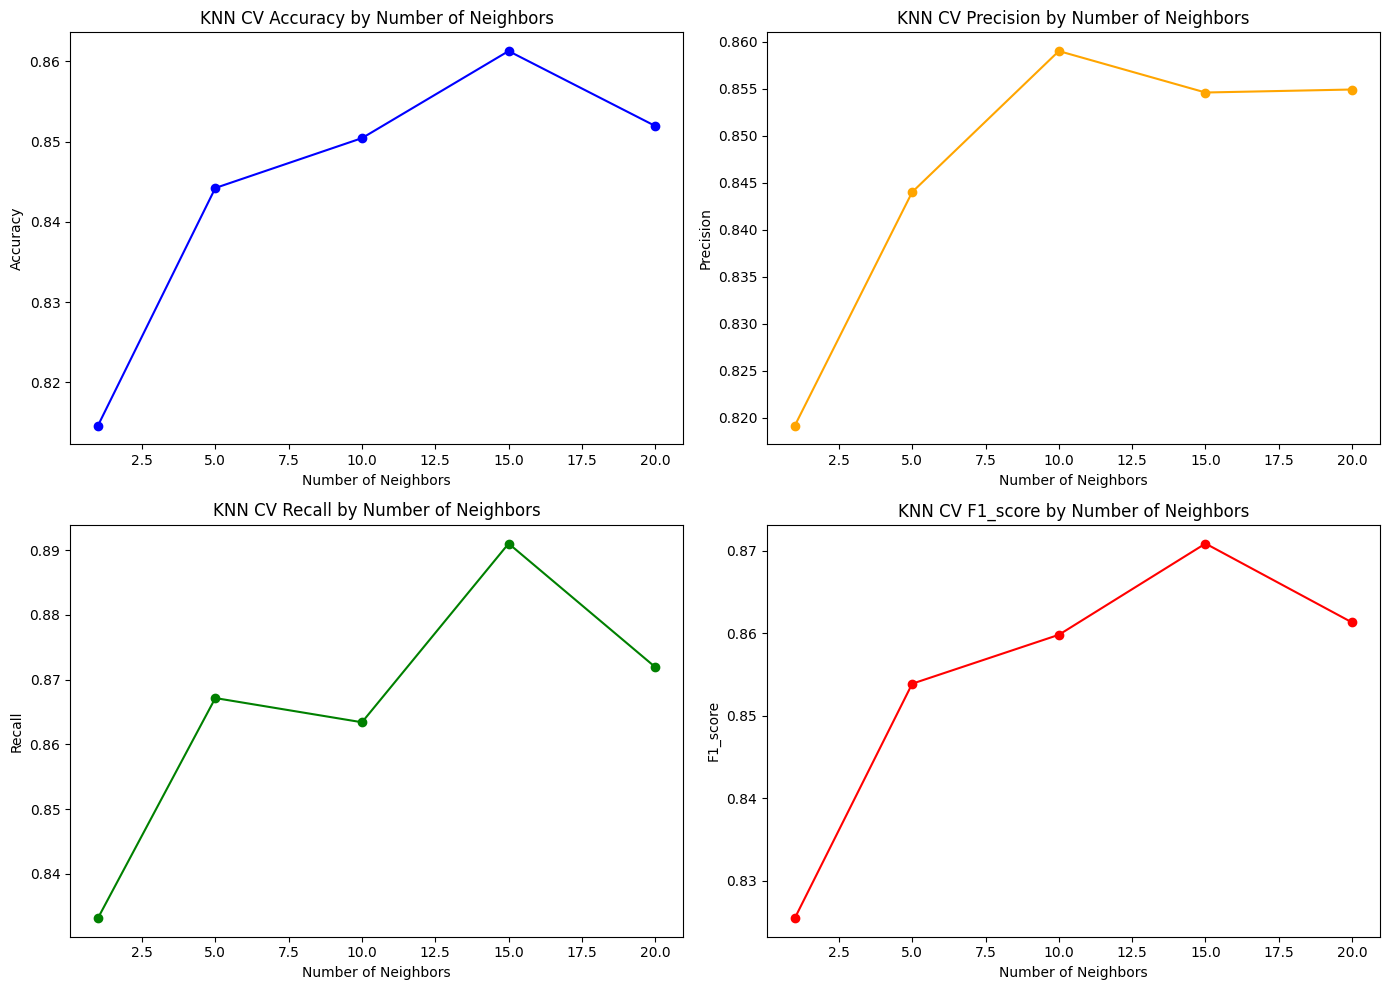

In [180]:
# KNN Model Configuration
model = KNeighborsClassifier()
params = {'n_neighbors': [1, 5, 10, 15, 20]}

start_time_knn = time.time()

# Perform multi-metric GridSearchCV
grid_search = GridSearchCV(model, params, cv=cv, scoring=scoring, refit='accuracy', return_train_score=False, n_jobs=-1)
grid_search.fit(X_train_norm, y_train)

training_time_knn = time.time() - start_time_knn
print(f"Training time: {training_time_knn:.3f} seconds")

# Extract the mean test scores for each metric
cv_results = grid_search.cv_results_

# Best model and predictions
best_model = grid_search.best_estimator_
y_pred_knn = best_model.predict(X_test_norm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

# Print the best parameters and the scores on the test set
print("KNN Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_}")
print(f"Test Accuracy: {accuracy_knn}")
print(f"Test Precision: {precision_knn}")
print(f"Test Recall: {recall_knn}")
print(f"Test F1 Score: {f1_score_knn}")

# Plotting the metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
colors = ['blue', 'orange', 'green', 'red']

# Loop through each metric to plot
for i, metric in enumerate(metrics):
    axes[i//2, i%2].plot(params['n_neighbors'], cv_results[f'mean_test_{metric}'], '-o', color=colors[i])
    axes[i//2, i%2].set_title(f'KNN CV {metric.capitalize()} by Number of Neighbors')
    axes[i//2, i%2].set_xlabel('Number of Neighbors')
    axes[i//2, i%2].set_ylabel(metric.capitalize())

plt.tight_layout()
plt.show()

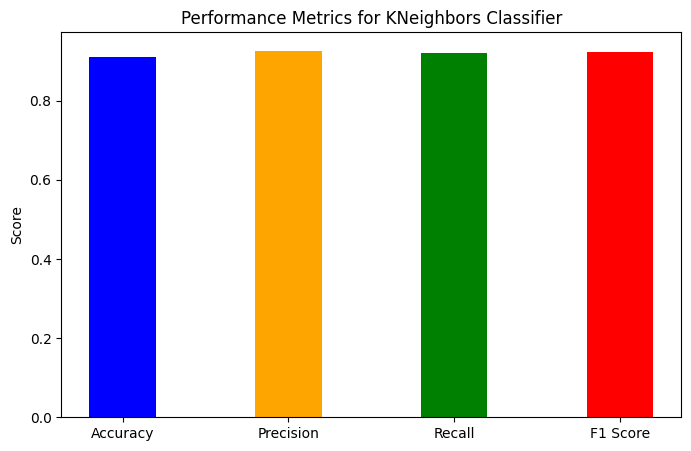

In [181]:
# Plotting results for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_knn = [accuracy_knn, precision_knn, recall_knn, f1_score_knn]

plt.figure(figsize=(8, 5))
for i, val in enumerate(values_knn):
    plt.bar(metrics[i], val, color=colors[i], width=0.4, label=f"{metrics[i]}: {val:.4f}")

plt.ylabel('Score')
plt.title('Performance Metrics for KNeighbors Classifier')
plt.show()

Training time: 32.003 seconds
Random Forest Results:
Best Parameters: {'n_estimators': 1000}
Best CV Accuracy: 0.8644137596899224
Test Accuracy: 0.8804347826086957
Precision: 0.901840490797546
Recall: 0.8963414634146342
F1 Score: 0.8990825688073395


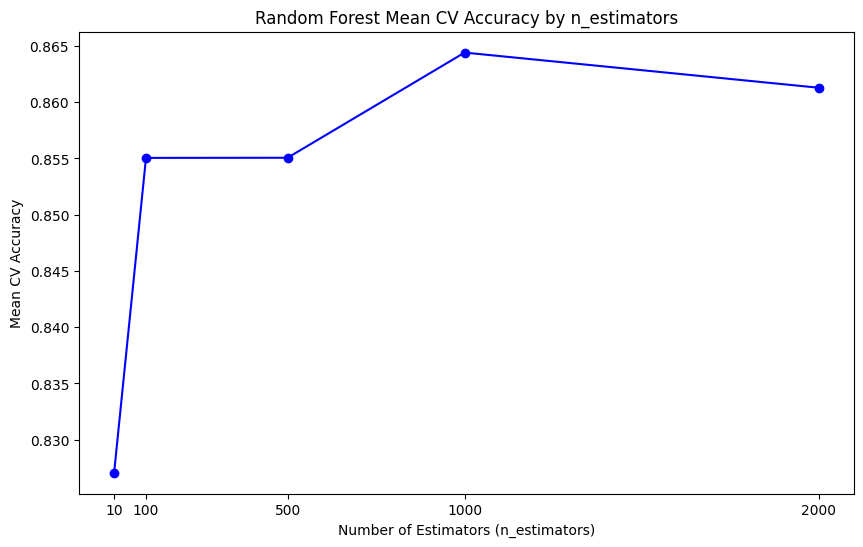

In [182]:
# Random Forest Model Configuration
model = RandomForestClassifier(random_state=7)
params = {
    'n_estimators': [10, 100, 500, 1000, 2000],
}

start_time_rf = time.time()

grid_search = GridSearchCV(model, params, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_norm, y_train)

training_time_rf = time.time() - start_time_rf
print(f"Training time: {training_time_rf:.3f} seconds")

# Results for the best model
best_model = grid_search.best_estimator_
y_pred_rf = best_model.predict(X_test_norm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

# Output results
print("Random Forest Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_}")
print(f"Test Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_score_rf}")

# Extract mean test scores for the n_estimators parameter
mean_test_scores = grid_search.cv_results_['mean_test_score']
n_estimators_values = params['n_estimators']
scores_for_n_estimators = {n: [] for n in n_estimators_values}

# Loop through all combinations and extract scores corresponding to each n_estimators value
for i, param_set in enumerate(grid_search.cv_results_['params']):
    n_estimators = param_set['n_estimators']
    scores_for_n_estimators[n_estimators].append(mean_test_scores[i])

# Average the scores for each n_estimators value
average_scores = {n: np.mean(scores) for n, scores in scores_for_n_estimators.items()}

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, average_scores.values(), '-o', color='blue')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean CV Accuracy')
plt.title('Random Forest Mean CV Accuracy by n_estimators')
plt.xticks(n_estimators_values)
plt.show()

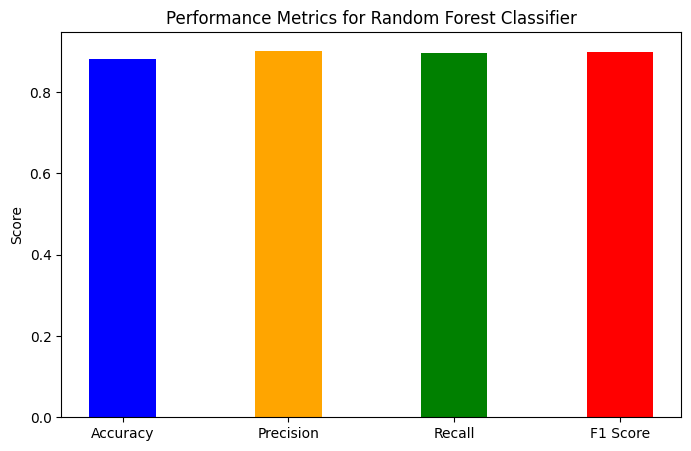

In [183]:
# Plotting results for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_rf = [accuracy_rf, precision_rf, recall_rf, f1_score_rf]

plt.figure(figsize=(8, 5))
for i, val in enumerate(values_rf):
    plt.bar(metrics[i], val, color=colors[i], width=0.4, label=f"{metrics[i]}: {val:.4f}")

plt.ylabel('Score')
plt.title('Performance Metrics for Random Forest Classifier')
plt.show()

Training time: 23.722 seconds
AdaBoost Results:
Best Parameters: {'learning_rate': 0.05, 'n_estimators': 300}
Best CV Accuracy: 0.8535368217054262
Test Accuracy: 0.8804347826086957
Test Precision: 0.9171974522292994
Test Recall: 0.8780487804878049
Test F1 Score: 0.897196261682243


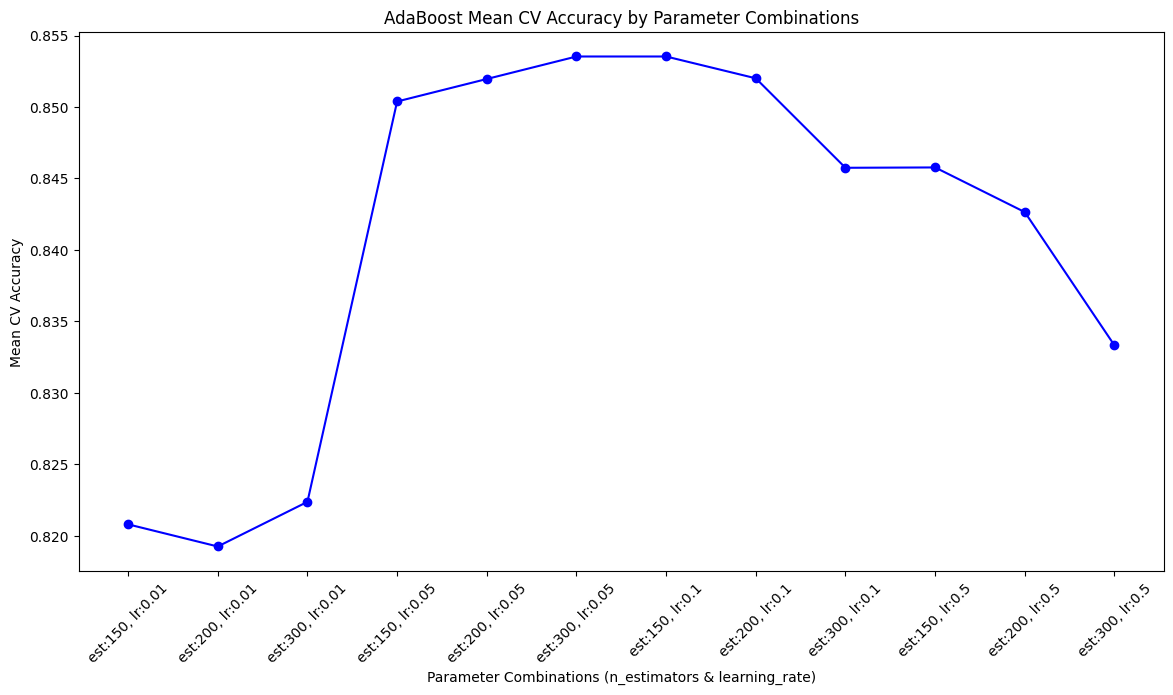

In [184]:
adaboost_model = AdaBoostClassifier(random_state=7)

# AdaBoost Model Configuration
adaboost_params = {
    'n_estimators': [150, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

start_time_adaboost = time.time()

adaboost_grid_search = GridSearchCV(adaboost_model, adaboost_params, cv=cv, scoring='accuracy', n_jobs=-1)
adaboost_grid_search.fit(X_train_norm, y_train)

training_time_adaboost = time.time() - start_time_adaboost
print(f"Training time: {training_time_adaboost:.3f} seconds")

# Get the best model from GridSearchCV
best_adaboost_model = adaboost_grid_search.best_estimator_
y_pred_adaboost = best_adaboost_model.predict(X_test_norm)

# Calculate and print scores for the test set
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_score_adaboost = f1_score(y_test, y_pred_adaboost)

print("AdaBoost Results:")
print(f"Best Parameters: {adaboost_grid_search.best_params_}")
print(f"Best CV Accuracy: {adaboost_grid_search.best_score_}")
print(f"Test Accuracy: {accuracy_adaboost}")
print(f"Test Precision: {precision_adaboost}")
print(f"Test Recall: {recall_adaboost}")
print(f"Test F1 Score: {f1_score_adaboost}")

# Plotting mean CV accuracy for each combination of n_estimators and learning_rate
mean_test_scores = adaboost_grid_search.cv_results_['mean_test_score']
params_combinations = [f"est:{param['n_estimators']}, lr:{param['learning_rate']}" for param in adaboost_grid_search.cv_results_['params']]

plt.figure(figsize=(14, 7))
plt.plot(params_combinations, mean_test_scores, '-o', color='blue')
plt.xlabel('Parameter Combinations (n_estimators & learning_rate)')
plt.ylabel('Mean CV Accuracy')
plt.title('AdaBoost Mean CV Accuracy by Parameter Combinations')
plt.xticks(rotation=45)
plt.show()

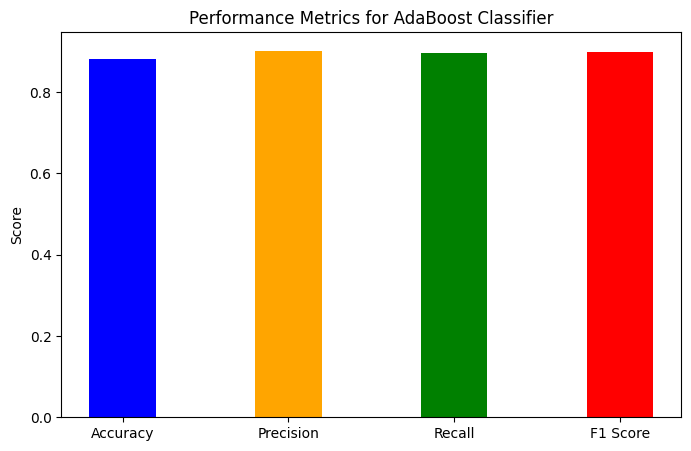

In [185]:
# Plotting results for AdaBoost Classifier
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_adaboost = [accuracy_adaboost, precision_adaboost, recall_adaboost, f1_score_adaboost]

plt.figure(figsize=(8, 5))
for i, val in enumerate(values_rf):
    plt.bar(metrics[i], val, color=colors[i], width=0.4, label=f"{metrics[i]}: {val:.4f}")

plt.ylabel('Score')
plt.title('Performance Metrics for AdaBoost Classifier')
plt.show()

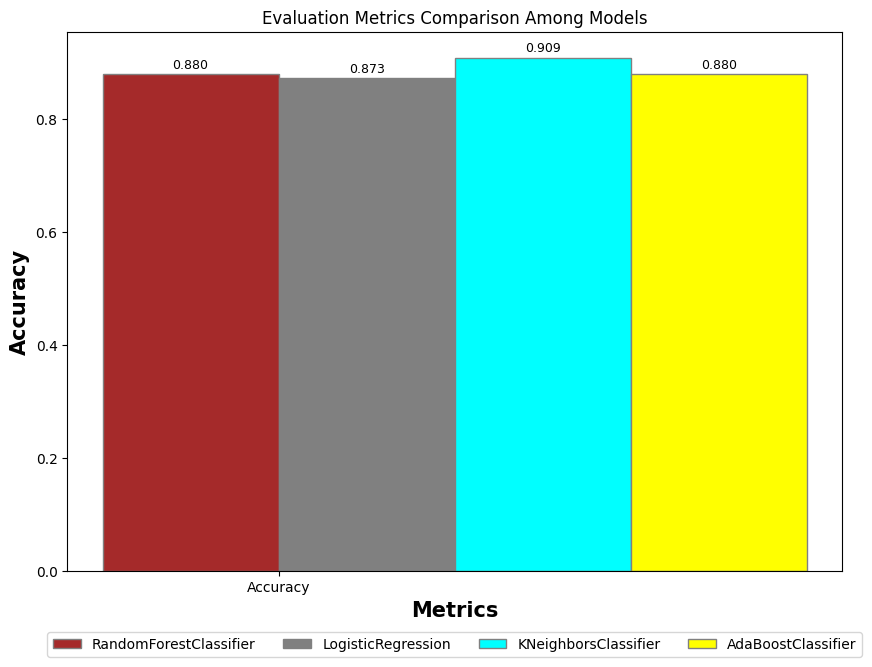

In [186]:
import matplotlib.pyplot as plt
import numpy as np

logistic_regression_scores = [accuracy_lr]
kneighbors_scores = [accuracy_knn]
random_forest_scores = [accuracy_rf]
adaboost_scores = [accuracy_adaboost]

# Labels for the bars
labels = ['Accuracy']

# Set position of bar on X axis
barWidth = 0.2
r1 = np.arange(len(random_forest_scores))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(10, 7))

plt.bar(r1, random_forest_scores, color='brown', width=barWidth, edgecolor='grey', label='RandomForestClassifier')
plt.bar(r2, logistic_regression_scores, color='gray', width=barWidth, edgecolor='grey', label='LogisticRegression')
plt.bar(r3, kneighbors_scores, color='cyan', width=barWidth, edgecolor='grey', label='KNeighborsClassifier')
plt.bar(r4, adaboost_scores, color='yellow', width=barWidth, edgecolor='grey', label='AdaBoostClassifier')

# Add labels
plt.xlabel('Metrics', fontweight='bold', fontsize=15)
plt.ylabel('Accuracy', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth/2 for r in range(len(random_forest_scores))], labels)

# Add values on top of the bars
for i in range(len(r1)):
    plt.text(x = r1[i], y = random_forest_scores[i] + 0.01, s = f"{random_forest_scores[i]:.3f}", size = 9, ha='center')
    plt.text(x = r2[i], y = logistic_regression_scores[i] + 0.01, s = f"{logistic_regression_scores[i]:.3f}", size = 9, ha='center')
    plt.text(x = r3[i], y = kneighbors_scores[i] + 0.01, s = f"{kneighbors_scores[i]:.3f}", size = 9, ha='center')
    plt.text(x = r4[i], y = adaboost_scores[i] + 0.01, s = f"{adaboost_scores[i]:.3f}", size = 9, ha='center')

# Create legend & Show graphic
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.title('Evaluation Metrics Comparison Among Models')

plt.show()